# 5.9.1 Gradiente Descendente Estocástico para Regresión

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_regression
from sklearn.linear_model import SGDRegressor


import warnings
warnings.filterwarnings("ignore")

Link: https://www.youtube.com/watch?v=l2iJAORWxHQ&list=PLEFpZ3YehTnCE1KFgZ4Ru1P9MMLElppNw&index=1

## 5.9.1.1 Definición

En este caso, se asume que el dataset esta formado por los ejemplos $(x_1, y_1), ⋯ ,(x_n, y_n)$, donde cada $x_i$ es un vector $m$ dimensional y $y$ es un escalar. <br>
En un modelo de regresión, la variable dependiente $y$ es una función lineal de las variables independientes $x_i$, tal que:

$$ f(x)=b+w^Tx $$

Donde:
$x$ es un patrón o ejemplo del dataset. <br>
$b$ es el intercepto del modelo. <br>
$w$ son los coeficientes de las variales independientes. <br>

## 5.9.1.2 Función de pérdida

En este modelo se minimiza:

$$ E(w) = \frac{1}{n} \sum_{i}^{}  L(y_i, f(x_i)) + \alpha R(w) $$

$L$ es una de las funciones de pérdida descritas a continuación:

- squared_error

$$ L(d,y)=(d−y)^2 $$

- huber

$$  
f(x) =
\begin{cases}
    \frac{1}{2}|d-y|^2 & \text{si } |d-y| \leq \epsilon \\
    \epsilon |d-y| - \frac{1}{2} \epsilon ^2 & \text{en cualquier otro caso}
\end{cases}
$$

- epsilon_insensitive

$$  
f(x) =
\begin{cases}
    0 & \text{si } |d-y| \leq \epsilon \\
    |d-y| - \epsilon & \text{en cualquier otro caso}
\end{cases}
$$

- squared_epsilon_insensitive

$$ L(d,y)=[epsilon_insensitive(d,y)]^2 $$

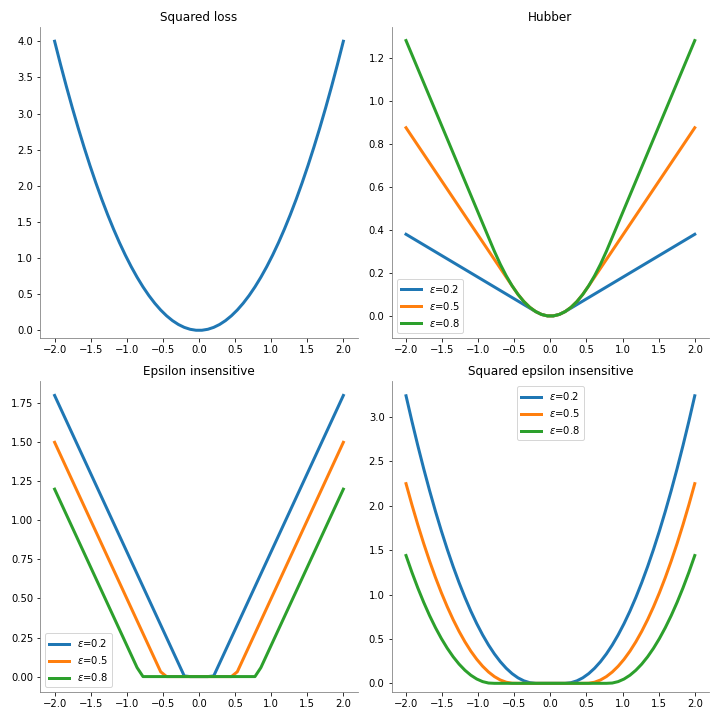


## 5.9.1.3 Regularización

$R$ es el término de regularización, el cual puede ser especificado como:

- L2:

$$ R(w)= \frac{1}{2} \sum_{j}^{} w_j^2 $$

- L1:

$$ R(w)=  \frac{1}{2} \sum_{j}^{} |w_j| $$

- Elastic Net:

$$ R(w)=\frac{\rho}{2} \sum_{j}^{} w_j^2 +(1 − \rho) \sum_{j}^{} |w_j| $$

## 5.9.1.4 Algoritmo de entrenamiento

La estimación de parámetros se realiza utilizando el algoritmo de gradiente descendente estocástico, actualizando los parámetros del modelo a medida que va recorriendo los ejemplos (patrón de entrenamiento).

$$ w \longleftarrow w - \eta [\alpha \frac{\delta R(w)}{\delta w} + \frac{\delta L (w^T x_i + b_i, y_i)}{\delta w}] $$

## 5.9.1.5 Ejemplo numérico

In [6]:
X, y = make_regression(
    n_samples=100,
    n_features=1,
    n_informative=1,
    bias=0.0,
    effective_rank=None,
    tail_strength=0.9,
    noise=10.0,
    shuffle=False,
    coef=False,
    random_state=12356,
)


sgdRegressor = SGDRegressor(
    # -----------------------------------------------------
    # 'squared_error', 'huber', 'epsilon_insensitive',
    # 'squared_epsilon_insensitive'
    loss="squared_error",
    # -----------------------------------------------------
    # # 'none', 'l2' (ridge), 'l1' (lasso), 'elasticnet'
    penalty="l2",
    # -----------------------------------------------------
    # Constant that multiplies the regularization term.
    alpha=0.0001,
    # -----------------------------------------------------
    # The Elastic Net mixing parameter
    l1_ratio=0.15,
    # -----------------------------------------------------
    # Whether the intercept should be estimated or not.
    fit_intercept=True,
    # -----------------------------------------------------
    # The maximum number of passes over the training data
    # (aka epochs)
    max_iter=1000,
    # -----------------------------------------------------
    # Whether or not the training data should be shuffled
    # after each epoch.
    shuffle=True,
    # -----------------------------------------------------
    # Epsilon in the epsilon-insensitive loss functions
    epsilon=0.1,
    # -----------------------------------------------------
    # Used for shuffling the data, when shuffle is set to
    # True.
    random_state=None,
    # -----------------------------------------------------
    # The learning rate schedule
    # 'constant', 'optimal', 'invscaling', 'adaptive'
    learning_rate="invscaling",
    # -----------------------------------------------------
    # The initial learning rate for the ‘constant’,
    # ‘invscaling’ or ‘adaptive’ schedules.
    eta0=0.01,
    # -----------------------------------------------------
    # The exponent for inverse scaling learning rate.
    power_t=0.25,
    # -----------------------------------------------------
    # Whether to use early stopping to terminate training
    # when validation score is not improving.
    early_stopping=False,
    # -----------------------------------------------------
    # The proportion of training data to set aside as
    # validation set for early stopping.
    validation_fraction=0.1,
    # -----------------------------------------------------
    # Number of iterations with no improvement to wait
    # before stopping fitting.
    n_iter_no_change=5,
    # -----------------------------------------------------
    # When set to True, reuse the solution of the previous
    # call to fit as initialization, otherwise, just erase
    # the previous solution.
    warm_start=False,
    # -----------------------------------------------------
    # When set to True, computes the averaged SGD weights
    # across all updates and stores the result in the
    # coef_ attribute.
    average=False,
)

sgdRegressor.fit(X, y)

display(
    sgdRegressor.coef_,
    sgdRegressor.intercept_,
)

array([44.17577421])

array([1.3089297])

In [12]:
def plot_regression(X_pred, y_pred):
    plt.scatter(X, y, marker="o", s=130, edgecolors="white", c="tab:blue")
    plt.plot(X_pred, y_pred, "-", linewidth=4, color="tab:orange")
    plt.gca().spines["left"].set_color("gray")
    plt.gca().spines["bottom"].set_color("gray")
    plt.gca().spines["top"].set_visible(False)
    plt.gca().spines["right"].set_visible(False)
    plt.xlabel("x")
    plt.ylabel("y")

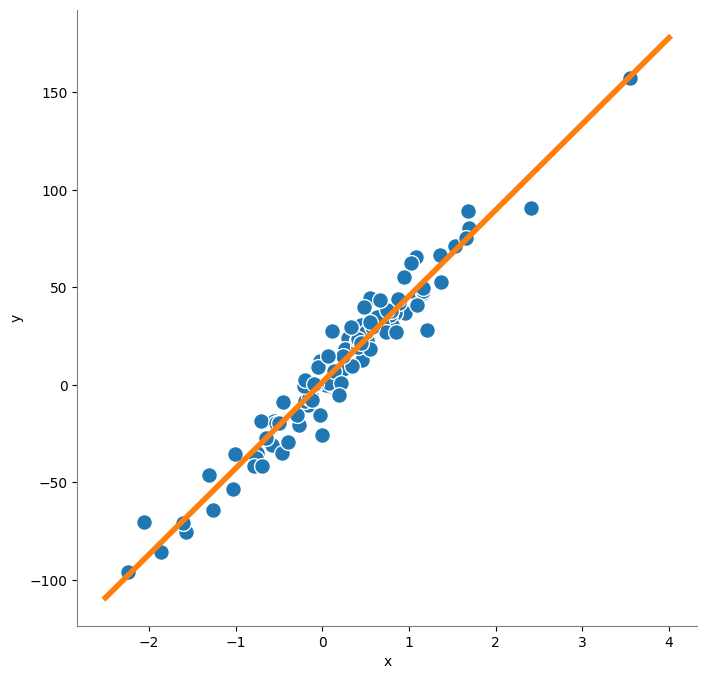

In [13]:
X_pred = np.linspace(start=-2.5, stop=4, num=50).reshape(-1, 1)
y_pred = sgdRegressor.predict(X_pred)

plt.figure(figsize=(8, 8))
plot_regression(X_pred, y_pred)
plt.show()

## 5.9.1.6 Aprendizaje online

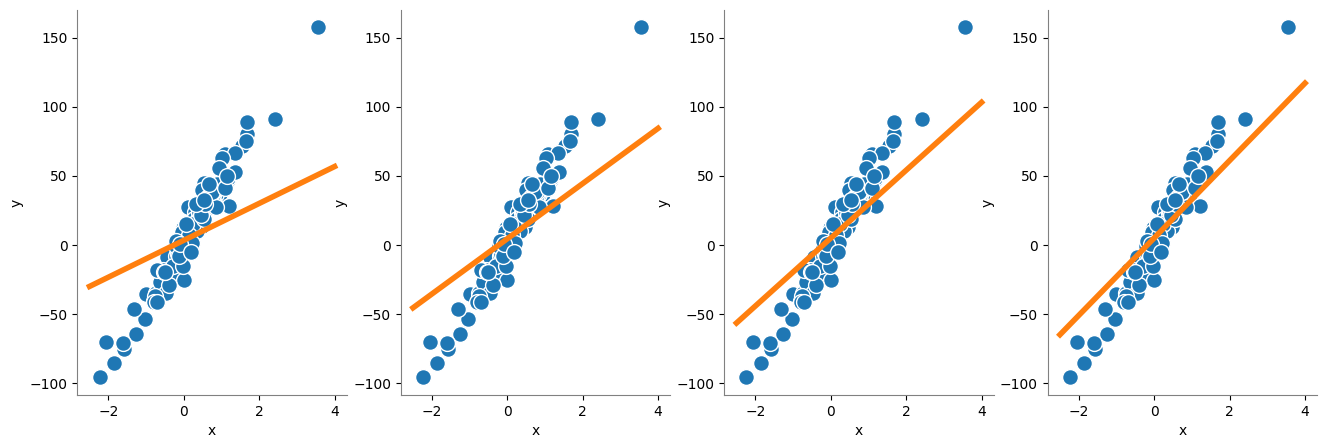

In [15]:
#
# Se tomarn los valores por defecto del constructor
#

sgdRegressor = SGDRegressor()

plt.figure(figsize=(16, 5))

for i in range(4):
    plt.subplot(1, 4, i + 1)
    sgdRegressor.partial_fit(X, y)
    y_pred = sgdRegressor.predict(X_pred)
    plot_regression(X_pred, y_pred)

plt.show()

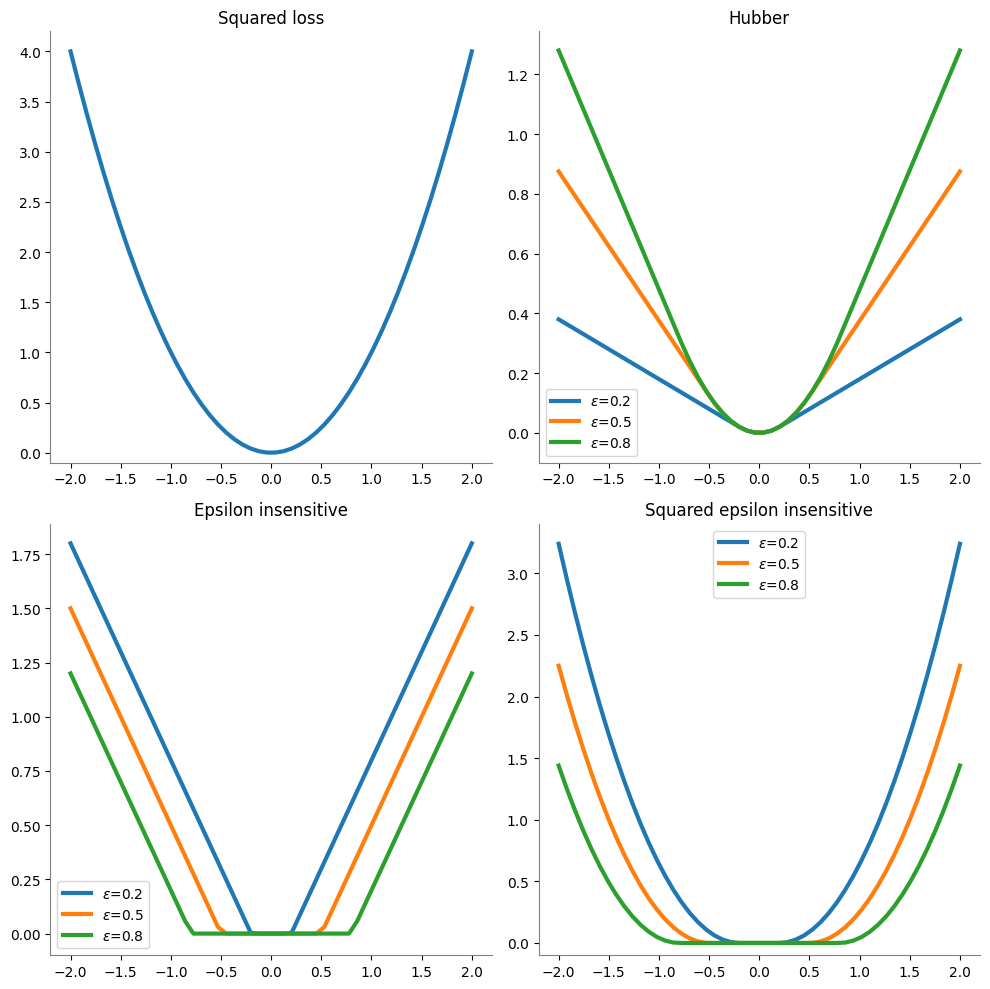

In [21]:
def fig1():

    plt.figure(figsize=(10, 10))
    errors = np.linspace(start=-2, stop=2, num=50, endpoint=True)

    def format_plot():
        plt.gca().spines["left"].set_color("gray")
        plt.gca().spines["bottom"].set_color("gray")
        plt.gca().spines["top"].set_visible(False)
        plt.gca().spines["right"].set_visible(False)
        ylim = plt.ylim()
        plt.ylim(-0.1, ylim[1])

    # -------------------------------------------------------------
    plt.subplot(2, 2, 1)
    squared_loss = np.power(errors, 2)
    plt.plot(errors, squared_loss, c="tab:blue", lw=3)
    plt.title("Squared loss")
    format_plot()

    # -------------------------------------------------------------
    def hubber(loss, epsilon):
        return np.where(
            np.abs(loss) <= epsilon,
            0.5 * np.power(loss, 2),
            epsilon * np.abs(loss) - 0.5 * epsilon ** 2,
        )

    plt.subplot(2, 2, 2)
    plt.plot(errors, hubber(errors, 0.2), c="tab:blue", lw=3, label="$\epsilon$=0.2")
    plt.plot(errors, hubber(errors, 0.5), c="tab:orange", lw=3, label="$\epsilon$=0.5")
    plt.plot(errors, hubber(errors, 0.8), c="tab:green", lw=3, label="$\epsilon$=0.8")
    plt.title("Hubber")
    format_plot()
    plt.legend()

    # -------------------------------------------------------------
    def epsilon_insensitive(loss, epsilon):
        return np.where(np.abs(loss) <= epsilon, 0, np.abs(loss) - epsilon)

    plt.subplot(2, 2, 3)
    plt.plot(
        errors,
        epsilon_insensitive(errors, 0.2),
        c="tab:blue",
        lw=3,
        label="$\epsilon$=0.2",
    )
    plt.plot(
        errors,
        epsilon_insensitive(errors, 0.5),
        c="tab:orange",
        lw=3,
        label="$\epsilon$=0.5",
    )
    plt.plot(
        errors,
        epsilon_insensitive(errors, 0.8),
        c="tab:green",
        lw=3,
        label="$\epsilon$=0.8",
    )
    format_plot()
    plt.title("Epsilon insensitive")
    plt.legend()

    # -------------------------------------------------------------
    def squared_epsilon_insensitive(loss, epsilon):
        return np.power(epsilon_insensitive(loss, epsilon), 2)

    plt.subplot(2, 2, 4)
    plt.plot(
        errors,
        squared_epsilon_insensitive(errors, 0.2),
        c="tab:blue",
        lw=3,
        label="$\epsilon$=0.2",
    )
    plt.plot(
        errors,
        squared_epsilon_insensitive(errors, 0.5),
        c="tab:orange",
        lw=3,
        label="$\epsilon$=0.5",
    )
    plt.plot(
        errors,
        squared_epsilon_insensitive(errors, 0.8),
        c="tab:green",
        lw=3,
        label="$\epsilon$=0.8",
    )
    plt.title("Squared epsilon insensitive")
    format_plot()
    plt.legend()

    plt.tight_layout()
    # plt.savefig("assets/loss_functions_regression.png")
    # plt.close()

fig1()

In [ ]:
print('ok_')